# Descriptor Calculation and Exploratory Data Analysis.


## **Install conda and rdkit**

In [1]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
!bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
!conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-11-29 14:32:18--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   105MB/s    in 0.8s    

2024-11-29 14:32:19 (105 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37

## **Load bioactivity data**

In [2]:
!wget https://raw.githubusercontent.com/221805/Bioactivity-Data/refs/heads/main/ACE_03_bioactivity_data_curated.csv

--2024-11-29 14:34:25--  https://raw.githubusercontent.com/221805/Bioactivity-Data/refs/heads/main/ACE_03_bioactivity_data_curated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56924 (56K) [text/plain]
Saving to: ‘ACE_03_bioactivity_data_curated.csv’

ACE_03_bioactivity_ 100%[===================>]  55.59K  --.-KB/s    in 0.002s  

2024-11-29 14:34:25 (28.3 MB/s) - ‘ACE_03_bioactivity_data_curated.csv’ saved [56924/56924]



In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('ACE_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL152758,CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O,90.0,active
1,CHEMBL291381,O=C(CCC(=O)N1CCCC1C(=O)O)NO,50000.0,inactive
2,CHEMBL358439,C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O,2400.0,intermediate
3,CHEMBL1237,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...,1.2,active
4,CHEMBL293213,CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O,260000.0,inactive
...,...,...,...,...
703,CHEMBL1201405,COc1cc2c(cc1OC)CN(C(=O)[C@H](C)N[C@@H](CCc1ccc...,3.0,active
704,CHEMBL5287967,C[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCc2cc...,5.8,active
705,CHEMBL1192519,O=C(O)CN1C(=O)[C@@H](N[C@@H](CCc2ccccc2)C(=O)O...,1.7,active
706,CHEMBL49920,C[C@H](NC(=O)[C@@H](CS)Cc1ccccc1)C(=O)N1Cc2ccc...,14.0,active


In [5]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [6]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [7]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL152758,90.0,active,CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O
1,CHEMBL291381,50000.0,inactive,O=C(CCC(=O)N1CCCC1C(=O)O)NO
2,CHEMBL358439,2400.0,intermediate,C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O
3,CHEMBL1237,1.2,active,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...
4,CHEMBL293213,260000.0,inactive,CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O
...,...,...,...,...
703,CHEMBL1201405,3.0,active,COc1cc2c(cc1OC)CN(C(=O)[C@H](C)N[C@@H](CCc1ccc...
704,CHEMBL5287967,5.8,active,C[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCc2cc...
705,CHEMBL1192519,1.7,active,O=C(O)CN1C(=O)[C@@H](N[C@@H](CCc2ccccc2)C(=O)O...
706,CHEMBL49920,14.0,active,C[C@H](NC(=O)[C@@H](CS)Cc1ccccc1)C(=O)N1Cc2ccc...


### **Import libraries**

In [8]:
!pip install rdkit

     |████████████████████████████████| 29.5 MB 1.4 MB/s 


In [9]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate lipinski descriptors**

In [10]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [11]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,258.274,-0.4868,3.0,4.0
1,230.220,-0.6524,3.0,4.0
2,244.247,-0.8753,3.0,4.0
3,405.495,1.2352,4.0,5.0
4,243.259,0.5629,2.0,3.0
...,...,...,...,...
703,470.522,2.1058,3.0,6.0
704,410.470,2.2611,3.0,4.0
705,396.443,2.0946,3.0,4.0
706,426.538,2.3179,3.0,4.0


In [12]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,258.274,-0.4868,3.0,4.0
1,230.220,-0.6524,3.0,4.0
2,244.247,-0.8753,3.0,4.0
3,405.495,1.2352,4.0,5.0
4,243.259,0.5629,2.0,3.0
...,...,...,...,...
703,470.522,2.1058,3.0,6.0
704,410.470,2.2611,3.0,4.0
705,396.443,2.0946,3.0,4.0
706,426.538,2.3179,3.0,4.0


In [13]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL152758,CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O,90.0,active
1,CHEMBL291381,O=C(CCC(=O)N1CCCC1C(=O)O)NO,50000.0,inactive
2,CHEMBL358439,C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O,2400.0,intermediate
3,CHEMBL1237,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...,1.2,active
4,CHEMBL293213,CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O,260000.0,inactive
...,...,...,...,...
703,CHEMBL1201405,COc1cc2c(cc1OC)CN(C(=O)[C@H](C)N[C@@H](CCc1ccc...,3.0,active
704,CHEMBL5287967,C[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCc2cc...,5.8,active
705,CHEMBL1192519,O=C(O)CN1C(=O)[C@@H](N[C@@H](CCc2ccccc2)C(=O)O...,1.7,active
706,CHEMBL49920,C[C@H](NC(=O)[C@@H](CS)Cc1ccccc1)C(=O)N1Cc2ccc...,14.0,active


Now, let's combine the 2 DataFrame

In [14]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [15]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL152758,CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O,90.0,active,258.274,-0.4868,3.0,4.0
1,CHEMBL291381,O=C(CCC(=O)N1CCCC1C(=O)O)NO,50000.0,inactive,230.220,-0.6524,3.0,4.0
2,CHEMBL358439,C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O,2400.0,intermediate,244.247,-0.8753,3.0,4.0
3,CHEMBL1237,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...,1.2,active,405.495,1.2352,4.0,5.0
4,CHEMBL293213,CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O,260000.0,inactive,243.259,0.5629,2.0,3.0
...,...,...,...,...,...,...,...,...
703,CHEMBL1201405,COc1cc2c(cc1OC)CN(C(=O)[C@H](C)N[C@@H](CCc1ccc...,3.0,active,470.522,2.1058,3.0,6.0
704,CHEMBL5287967,C[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCc2cc...,5.8,active,410.470,2.2611,3.0,4.0
705,CHEMBL1192519,O=C(O)CN1C(=O)[C@@H](N[C@@H](CCc2ccccc2)C(=O)O...,1.7,active,396.443,2.0946,3.0,4.0
706,CHEMBL49920,C[C@H](NC(=O)[C@@H](CS)Cc1ccccc1)C(=O)N1Cc2ccc...,14.0,active,426.538,2.3179,3.0,4.0


### **Convert IC50 to pIC50**


In [16]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

In [17]:
df_combined.standard_value.describe()

,standard_value
count,7.080000e+02
mean,3.170974e+06
std,5.311457e+07
min,2.900000e-02
25%,1.508250e+01
50%,3.945250e+02
75%,1.200000e+04
max,1.000000e+09


In [18]:
-np.log10( (10**-9)* 100000000 )

1.0

In [19]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [20]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

In [21]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL152758,CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O,active,258.274,-0.4868,3.0,4.0,90.0
1,CHEMBL291381,O=C(CCC(=O)N1CCCC1C(=O)O)NO,inactive,230.220,-0.6524,3.0,4.0,50000.0
2,CHEMBL358439,C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O,intermediate,244.247,-0.8753,3.0,4.0,2400.0
3,CHEMBL1237,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...,active,405.495,1.2352,4.0,5.0,1.2
4,CHEMBL293213,CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O,inactive,243.259,0.5629,2.0,3.0,260000.0
...,...,...,...,...,...,...,...,...
703,CHEMBL1201405,COc1cc2c(cc1OC)CN(C(=O)[C@H](C)N[C@@H](CCc1ccc...,active,470.522,2.1058,3.0,6.0,3.0
704,CHEMBL5287967,C[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCc2cc...,active,410.470,2.2611,3.0,4.0,5.8
705,CHEMBL1192519,O=C(O)CN1C(=O)[C@@H](N[C@@H](CCc2ccccc2)C(=O)O...,active,396.443,2.0946,3.0,4.0,1.7
706,CHEMBL49920,C[C@H](NC(=O)[C@@H](CS)Cc1ccccc1)C(=O)N1Cc2ccc...,active,426.538,2.3179,3.0,4.0,14.0


In [22]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,7.080000e+02
mean,6.286009e+05
std,5.501429e+06
min,2.900000e-02
25%,1.508250e+01
50%,3.945250e+02
75%,1.200000e+04
max,1.000000e+08


In [23]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL152758,CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O,active,258.274,-0.4868,3.0,4.0,7.045757
1,CHEMBL291381,O=C(CCC(=O)N1CCCC1C(=O)O)NO,inactive,230.220,-0.6524,3.0,4.0,4.301030
2,CHEMBL358439,C[C@@H](NCC(=O)O)C(=O)N1CCC[C@H]1C(=O)O,intermediate,244.247,-0.8753,3.0,4.0,5.619789
3,CHEMBL1237,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...,active,405.495,1.2352,4.0,5.0,8.920819
4,CHEMBL293213,CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O,inactive,243.259,0.5629,2.0,3.0,3.585027
...,...,...,...,...,...,...,...,...
703,CHEMBL1201405,COc1cc2c(cc1OC)CN(C(=O)[C@H](C)N[C@@H](CCc1ccc...,active,470.522,2.1058,3.0,6.0,8.522879
704,CHEMBL5287967,C[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCc2cc...,active,410.470,2.2611,3.0,4.0,8.236572
705,CHEMBL1192519,O=C(O)CN1C(=O)[C@@H](N[C@@H](CCc2ccccc2)C(=O)O...,active,396.443,2.0946,3.0,4.0,8.769551
706,CHEMBL49920,C[C@H](NC(=O)[C@@H](CS)Cc1ccccc1)C(=O)N1Cc2ccc...,active,426.538,2.3179,3.0,4.0,7.853872


In [24]:
df_final.pIC50.describe()

,pIC50
count,708.000000
mean,6.223084
std,1.909331
min,1.000000
25%,4.920819
50%,6.403967
75%,7.821529
max,10.537602


In [25]:
df_final.to_csv('ACE_04_bioactivity_data_3class_pIC50.csv')

In [26]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL152758,CC(N[C@H](C)C(=O)N1CCC[C@H]1C(=O)O)C(=O)O,active,258.274,-0.4868,3.0,4.0,7.045757
1,CHEMBL291381,O=C(CCC(=O)N1CCCC1C(=O)O)NO,inactive,230.220,-0.6524,3.0,4.0,4.301030
3,CHEMBL1237,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...,active,405.495,1.2352,4.0,5.0,8.920819
4,CHEMBL293213,CC(CCC(=O)N1CCCC1C(=O)O)C(=O)O,inactive,243.259,0.5629,2.0,3.0,3.585027
6,CHEMBL577,C[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCC[C@...,active,348.399,1.1261,3.0,4.0,8.920819
...,...,...,...,...,...,...,...,...
703,CHEMBL1201405,COc1cc2c(cc1OC)CN(C(=O)[C@H](C)N[C@@H](CCc1ccc...,active,470.522,2.1058,3.0,6.0,8.522879
704,CHEMBL5287967,C[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCc2cc...,active,410.470,2.2611,3.0,4.0,8.236572
705,CHEMBL1192519,O=C(O)CN1C(=O)[C@@H](N[C@@H](CCc2ccccc2)C(=O)O...,active,396.443,2.0946,3.0,4.0,8.769551
706,CHEMBL49920,C[C@H](NC(=O)[C@@H](CS)Cc1ccccc1)C(=O)N1Cc2ccc...,active,426.538,2.3179,3.0,4.0,7.853872


In [27]:
df_2class.to_csv('ACE_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis via Lipinski descriptors**

### **Import library**

In [28]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

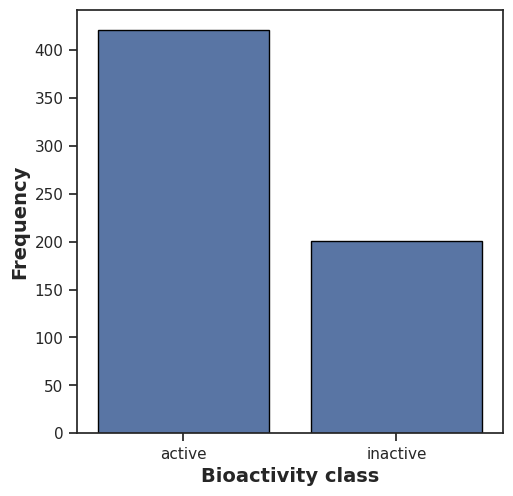

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**



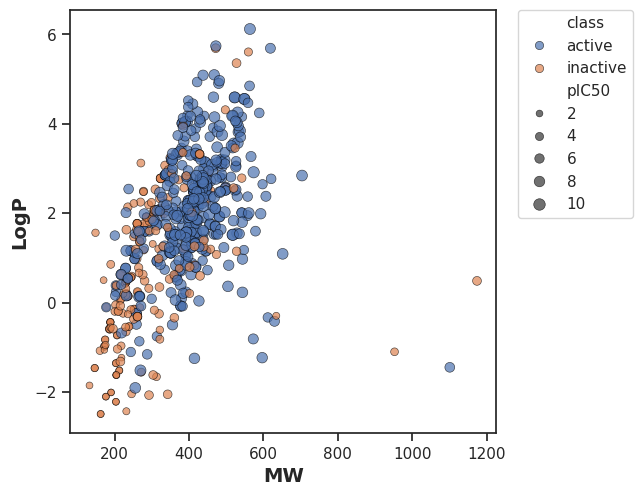

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

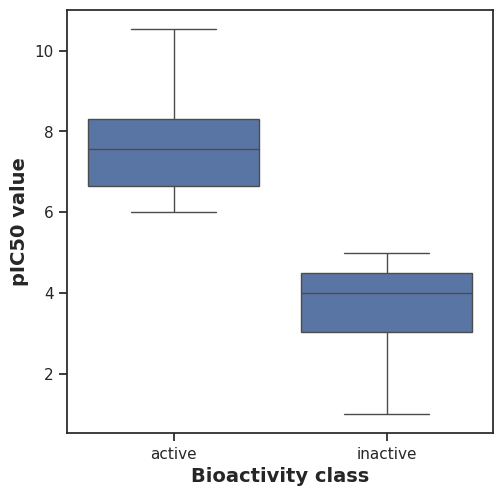

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [32]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [33]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,84621.0,1.257914e-90,0.05,Different distribution (reject H0)


#### **MW**

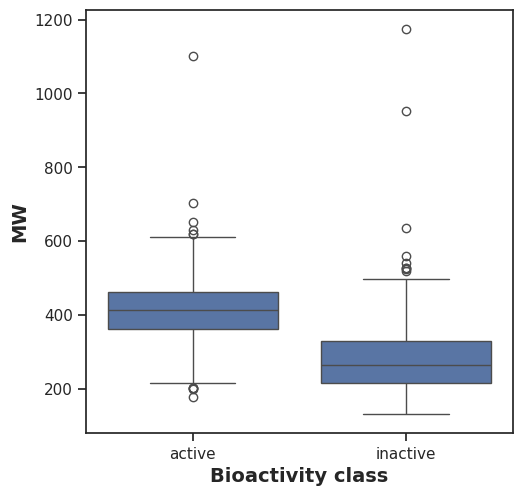

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [35]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,70233.0,1.734273e-40,0.05,Different distribution (reject H0)


#### **LogP**

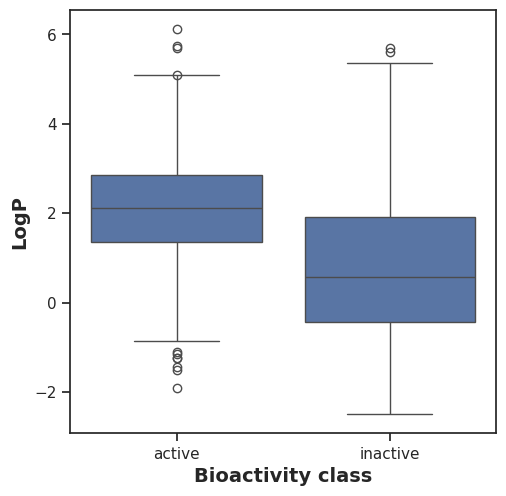

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [37]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,63219.5,1.952654e-23,0.05,Different distribution (reject H0)


#### **NumHDonors**

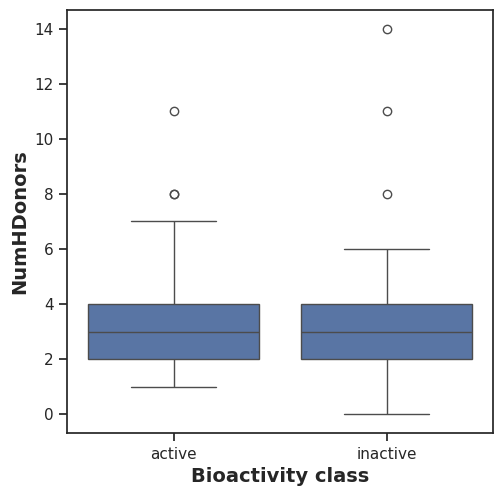

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [39]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,46184.5,0.054393,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

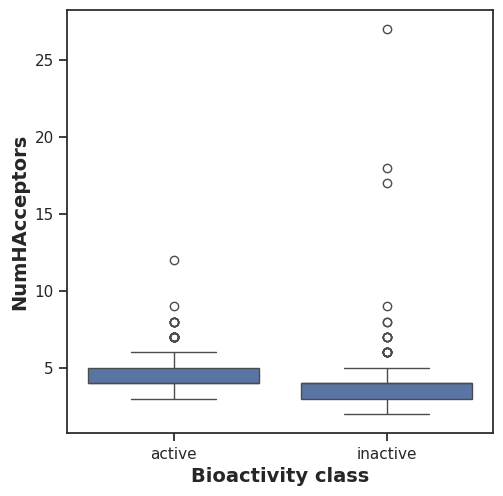

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [41]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,58462.5,8.212460e-16,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

## **Zip files**

In [42]:
! zip -r results.zip . -i *.csv *.pdf

  adding: ACE_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: ACE_03_bioactivity_data_curated.csv (deflated 81%)
  adding: ACE_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: plot_MW.pdf (deflated 39%)
  adding: plot_LogP.pdf (deflated 40%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_MW_vs_LogP.pdf (deflated 5%)
